In [15]:
import numpy as np
import re
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def fit_positive_linear(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    penalty_weight = 5
    
    # Loss function (mean squared error)
    def loss(params):
        a, b = params
        violation = np.maximum(0, y - (a * x + b))  # Capture violations
        penalty = penalty_weight * np.sum(violation ** 2)  # Stronger penalty for violations
        return np.sum((a * x + b - y) ** 2) + penalty
    
    # Initial guess
    initial_guess = [1.0, 1.0]
    
    # Constraints
    bounds = [(1e-6, None), (1e-6, None)]  # Small threshold to avoid zero
    
    # Run optimization
    result = minimize(loss, initial_guess, bounds=bounds)
    
    return result.x  # Returns [a, b]

**STOCHASTIC SETTING**

Optimal parameters: L_1 = 2.9594, L_0 = 0.0000


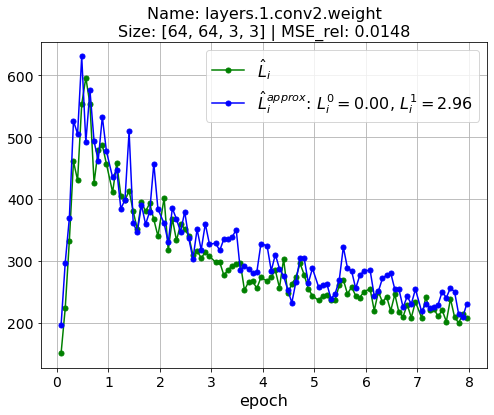

In [16]:
# Sample log file path
log_file_path = "output.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+\.\d+) \(1\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$\hat{L}_i$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Name: layers.1.conv2.weight\n'
          f'Size: [64, 64, 3, 3] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot1.pdf', format='pdf', bbox_inches='tight')
plt.show()

Optimal parameters: L_1 = 2.6405, L_0 = 15.1609


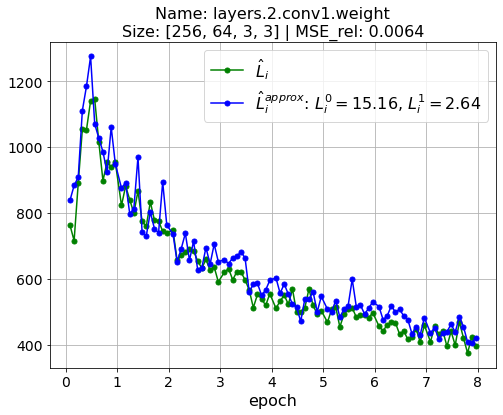

In [17]:
# Sample log file path
log_file_path = "output.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+\.\d+) \(2\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$\hat{L}_i$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Name: layers.2.conv1.weight\n'
          f'Size: [256, 64, 3, 3] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot2.pdf', format='pdf', bbox_inches='tight')
plt.show()

Optimal parameters: L_1 = 1.7973, L_0 = 179.2519


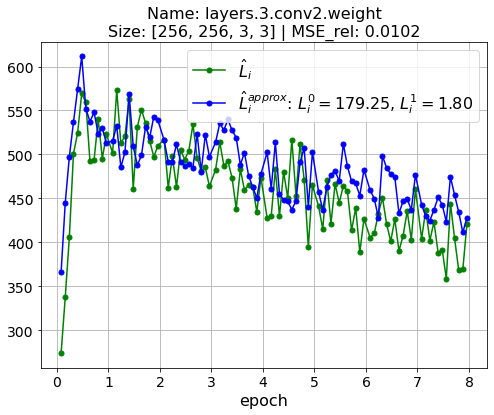

In [18]:
# Sample log file path
log_file_path = "output.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+\.\d+) \(5\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$\hat{L}_i$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Name: layers.3.conv2.weight\n'
          f'Size: [256, 256, 3, 3] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot3.pdf', format='pdf', bbox_inches='tight')
plt.show()

Optimal parameters: L_1 = 3.3090, L_0 = 47.7779


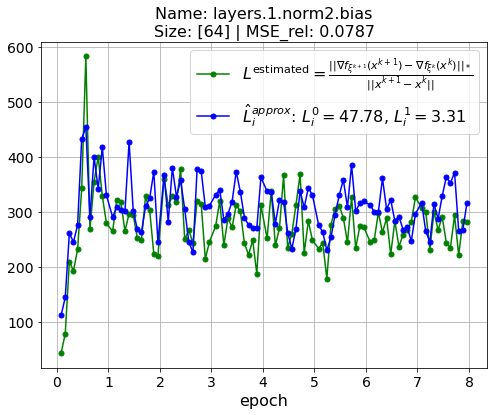

In [19]:
# Sample log file path
log_file_path = "output.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+\.\d+) \(8\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$L^{\mathrm{estimated}} = \frac{||\nabla f_{\xi^{k+1}}(x^{k+1}) - \nabla f_{\xi^{k}}(x^k)||_*}{||x^{k+1} - x^{k}||}$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Name: layers.1.norm2.bias\n'
          f'Size: [64] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot4.pdf', format='pdf', bbox_inches='tight')
plt.show()

Optimal parameters: L_1 = 2.9935, L_0 = 62.2610


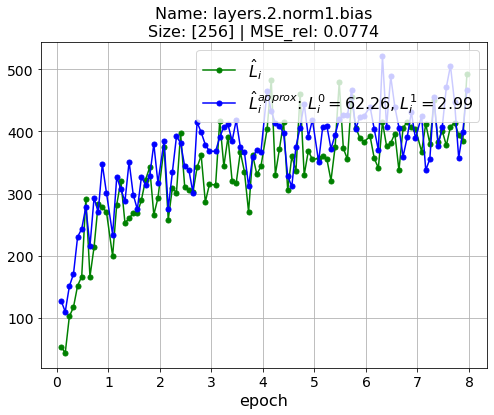

In [20]:
# Sample log file path
log_file_path = "output.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+\.\d+) \(9\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$\hat{L}_i$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Name: layers.2.norm1.bias\n'
          f'Size: [256] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot5.pdf', format='pdf', bbox_inches='tight')
plt.show()

Optimal parameters: L_1 = 0.0303, L_0 = 0.0095


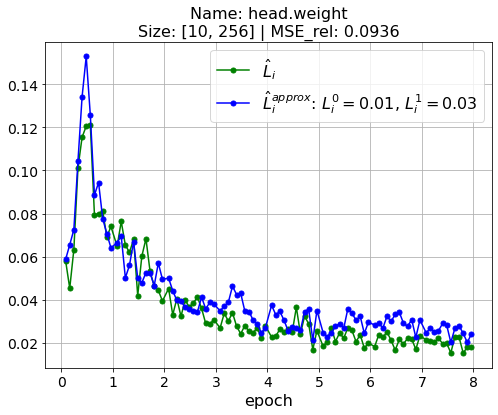

In [21]:
# Sample log file path
log_file_path = "output.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+\.\d+) \(13\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$\hat{L}_i$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Name: head.weight\n'
          f'Size: [10, 256] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot6.pdf', format='pdf', bbox_inches='tight')
plt.show()

**DETERMINISTIC SETTING**

Optimal parameters: L_1 = 3.1964, L_0 = 0.0000


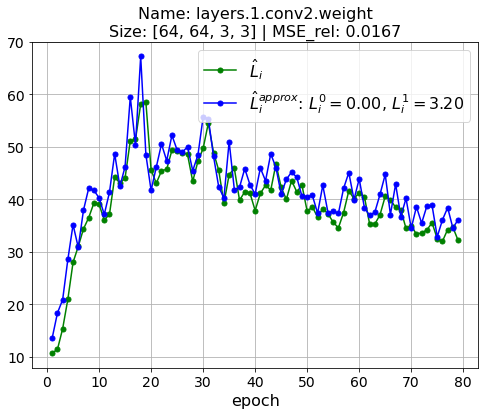

In [28]:
# Sample log file path
log_file_path = "output_full_batch.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+) \(1\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$\hat{L}_i$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Name: layers.1.conv2.weight\n'
          f'Size: [64, 64, 3, 3] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot1_fb.pdf', format='pdf', bbox_inches='tight')
plt.show()

Optimal parameters: L_1 = 2.8131, L_0 = 0.0000


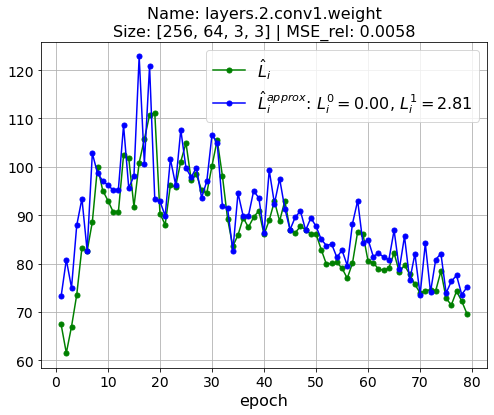

In [29]:
# Sample log file path
log_file_path = "output_full_batch.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+) \(2\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$\hat{L}_i$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Name: layers.2.conv1.weight\n'
          f'Size: [256, 64, 3, 3] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot2_fb.pdf', format='pdf', bbox_inches='tight')
plt.show()

Optimal parameters: L_1 = 2.8439, L_0 = 0.0000


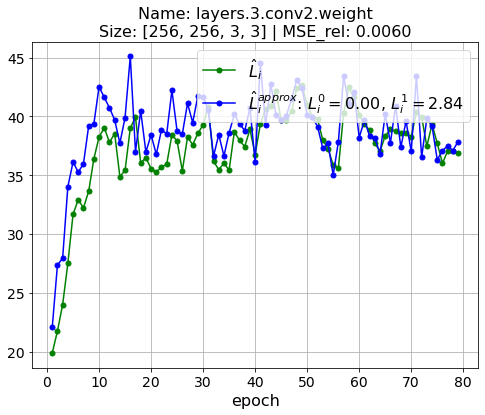

In [30]:
# Sample log file path
log_file_path = "output_full_batch.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+) \(5\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$\hat{L}_i$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Name: layers.3.conv2.weight\n'
          f'Size: [256, 256, 3, 3] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot3_fb.pdf', format='pdf', bbox_inches='tight')
plt.show()

Optimal parameters: L_1 = 4.0620, L_0 = 0.0000


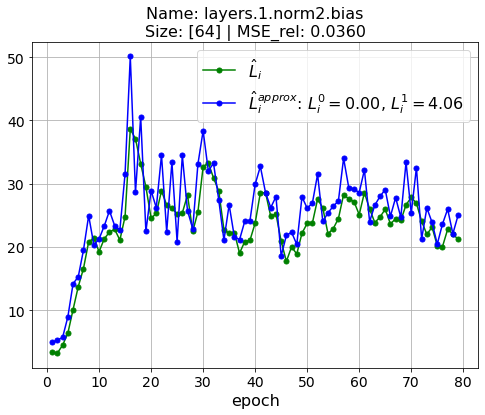

In [31]:
# Sample log file path
log_file_path = "output_full_batch.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+) \(8\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$\hat{L}_i$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Name: layers.1.norm2.bias\n'
          f'Size: [64] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot4_fb.pdf', format='pdf', bbox_inches='tight')
plt.show()

Optimal parameters: L_1 = 3.8909, L_0 = 0.0000


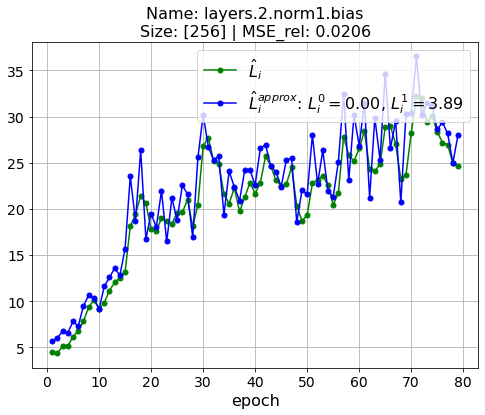

In [32]:
# Sample log file path
log_file_path = "output_full_batch.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+) \(9\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$\hat{L}_i$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(f'Name: layers.2.norm1.bias\n'
          f'Size: [256] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot5_fb.pdf', format='pdf', bbox_inches='tight')
plt.show()

Optimal parameters: L_1 = 0.0403, L_0 = 0.0000


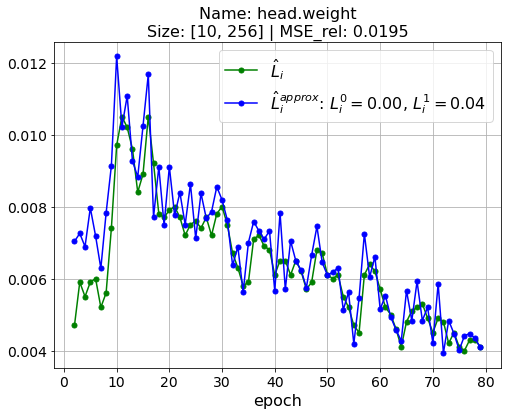

In [33]:
# Sample log file path
log_file_path = "output_full_batch.txt"  # Change this to your actual log file path

# Lists to store extracted values
L_estimated_values = []
norm_grad_values = []

# Regular expression pattern to match L_estimated and norm_grad lines
pattern = re.compile(r"step:(\d+) \(13\) L_estimated: ([\d\.]+) norm_grad: ([\d\.]+)")

step_values = []
L_estimated_values = []
norm_grad_values = []

with open(log_file_path, "r") as file:
    for line in file:
        match = pattern.search(line)
        if match:
            step_values.append(float(match.group(1)))         # step
            L_estimated_values.append(float(match.group(2)))  # L_estimated
            norm_grad_values.append(float(match.group(3)))    # norm_grad

step_values = step_values[1:]
L_estimated_values = L_estimated_values[1:]
norm_grad_values = norm_grad_values[1:]           
            
# Use extracted values from log file
a, b = fit_positive_linear(norm_grad_values, L_estimated_values)
print(f"Optimal parameters: L_1 = {a:.4f}, L_0 = {b:.4f}")

# Compute vectors
y_actual = np.array(L_estimated_values)
y_predicted = a * np.array(norm_grad_values) + b
mse = np.mean(np.square(np.abs(y_actual - y_predicted) / np.abs(y_actual)))
x = np.array(step_values)

# Plot results

plt.figure(figsize=(8, 6))
plt.plot(x, y_actual, 'o-', markersize=5, label=r'$\hat{L}_i$', color='green')
plt.plot(x, y_predicted, 'o-', markersize=5, 
         label = r'$\hat{L}^{approx}_i$' + f': $L_i^0 = {b:.2f}$, $L_i^1 = {a:.2f}$', color='blue')
plt.xlabel('epoch', fontsize=16)
plt.legend(fontsize=16, loc='upper right')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Name: head.weight\nSize: [10, 256]', fontsize=16)
plt.title(f'Name: head.weight\n'
          f'Size: [10, 256] | MSE_rel: {mse:.4f}', fontsize=16)
plt.savefig('plot6_fb.pdf', format='pdf', bbox_inches='tight')
plt.show()